In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style(style="whitegrid")

**Lets have a look at the Dataset**

In [2]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv',low_memory=False)
print(f"The dimensions of the dataset: {data.shape}")
data.columns = data.iloc[0]
data.drop(data.index[0],inplace=True)
data.head()

The dimensions of the dataset: (20037, 355)


,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
questions = list(data.columns)
question_df = pd.DataFrame(data.columns,columns=['questions'])
print(questions[:15])

['Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++', 'What programming lan

**AGE GROUPS**

Millennials in the DS community : 7797
% of Millennials in the DS community : 38.914953084447994


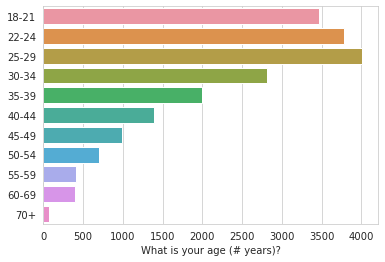

In [4]:
age_groups = data[data.columns[1]].value_counts().sort_index()
sns.barplot(age_groups,age_groups.index)
mill = age_groups["22-24"] + age_groups["25-29"]
mill_percentage = (mill/age_groups.sum())*100
print(f"Millennials in the DS community : {mill}")
print(f"% of Millennials in the DS community : {mill_percentage}")
plt.show()

* 39 % of the People who Answered the survey were millenials.

**GENDER**

Men are more than women in this field by 307.14285714285717%


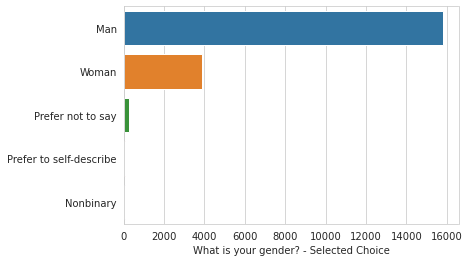

In [5]:
gender = data[data.columns[2]].value_counts()
sns.barplot(gender,gender.index)
man = gender['Man']
woman = gender['Woman']
diff_p = ((man-woman)/woman)*100
print(f"Men are more than women in this field by {diff_p}%")
plt.show()

* Most definitely Men dominate in the number game in the DS community by 307%

**Gender Based Age Analysis**

In [6]:
Male = data[data[questions[2]] == 'Man']
Female = data[data[questions[2]] == 'Woman']

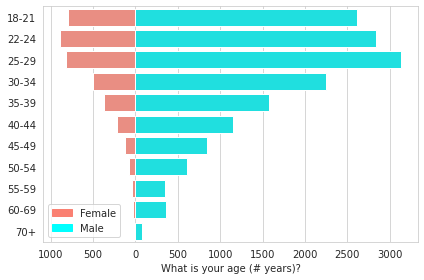

In [7]:
fig, ax = plt.subplots()
m_age_groups = Male[Male.columns[1]].value_counts().sort_index()
sns.barplot(m_age_groups,m_age_groups.index,color="cyan")
f_age_groups = Female[Female.columns[1]].value_counts().sort_index()
sns.barplot(-1 * f_age_groups,f_age_groups.index,color="salmon")
ticks =  ax.get_xticks()
plt.tight_layout()
ax.set_xticklabels([int(abs(tick)) for tick in ticks])

red_patch = mpatches.Patch(color='salmon', label='Female')
black_patch = mpatches.Patch(color='cyan', label='Male')
plt.legend(handles=[red_patch, black_patch])

plt.show()

**COUNTRY of ORIGIN**

The percentage of Indians in the DS Community 29.202435615891396


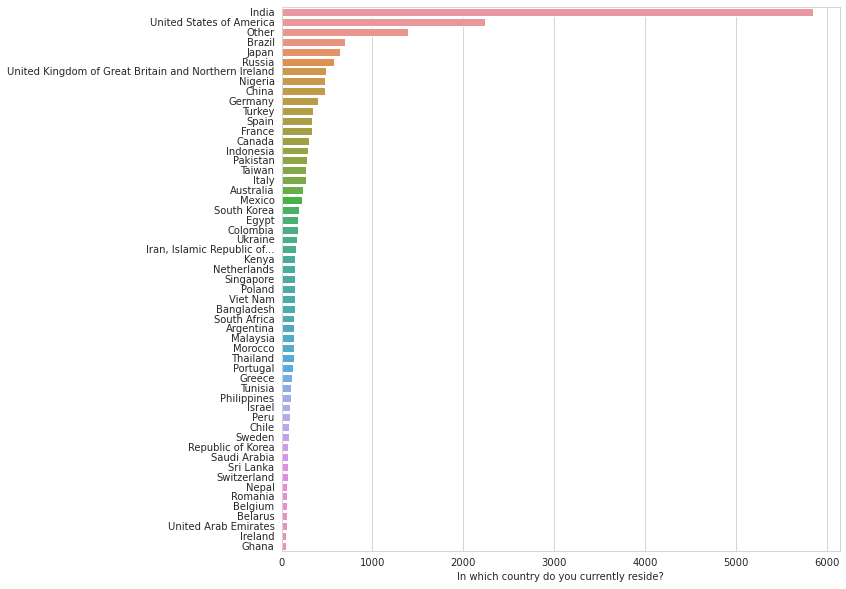

In [8]:
plt.rcParams['figure.figsize']=10,10
country = data[data.columns[3]].value_counts()
perce = (country['India']/country.sum())*100
print(f"The percentage of Indians in the DS Community {perce}")
sns.barplot(country,country.index)
plt.show()

* Close to 30% of all the members who answered the survey are indians. Indians definitely win the numbers game.
* Its also interesting to see that nigerians are very close to china,germany and UK. Which is surprising considering Nigeria has 40 percent of population under poverty line. DS education seems to grow there.

 **QUALIFICATION**

Masters and Bachelor graduates constitute 80.32091573406919% of the total demographic.


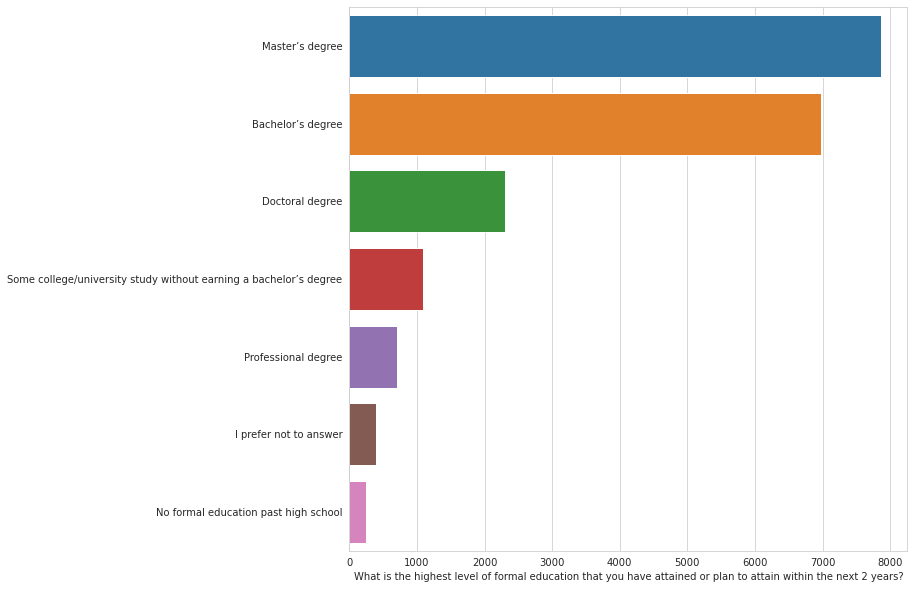

In [9]:
ITEM = data[data.columns[4]].value_counts()
perc = ((ITEM.iloc[0] + ITEM.iloc[0])/ITEM.sum())*100
print(f"Masters and Bachelor graduates constitute {perc}% of the total demographic.")
sns.barplot(ITEM,ITEM.index)
plt.show()

* 80.32% people are masters and bachelor graduates, which is expected.

**Programming Languages Used**

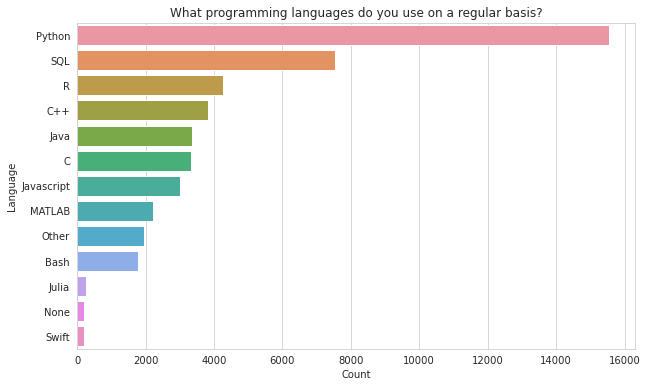

In [10]:
plt.rcParams['figure.figsize']=10,6
prog_lang = data.filter(regex = ("What programming languages do you use on a regular basis?"))
desc = prog_lang.describe()
prog_count = desc.iloc[0].values
prog_names = desc.iloc[2].values
prog_df = pd.DataFrame({"Language":prog_names,"Count":prog_count})
prog_df = prog_df.set_index('Language')
prog_df.sort_values(inplace=True,by="Count",ascending=False)
sns.barplot(prog_df.Count,prog_df.index)
plt.title('What programming languages do you use on a regular basis?')
plt.show()

* Its not surprising to see python as the most used language as most of the tools and frameworks are written for python, SQL is used extensively for data storage and retrieving so it is also mostly used I guess. R,C,C++,Java have almost same usage.

**Platform used to Learn Data Science**

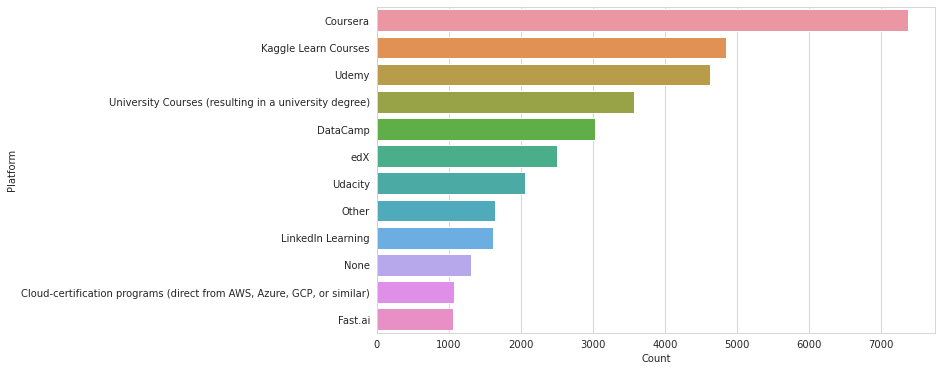

In [11]:
plt.rcParams['figure.figsize']=10,6
item = data.filter(regex = ("On which platforms have you begun or completed data science courses?"))
desc = item.describe()
item_count = desc.iloc[0].values
item_names = desc.iloc[2].values
item_df = pd.DataFrame({"Platform":item_names,"Count":item_count})
item_df = item_df.set_index('Platform')
item_df.sort_values(inplace=True,by="Count",ascending=False)
sns.barplot(item_df.Count,item_df.index)
plt.show()

* The popularity of coursera is very much expected as well, This is very much expected as Most people start their career through Andrew Ng's course.